In [ ]:
#Step 0. Read in Data and NLTK Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
# Read in data
df = pd.read_csv('/content/news_sentiment_analysis.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(3500, 8)
(500, 8)


In [ ]:
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


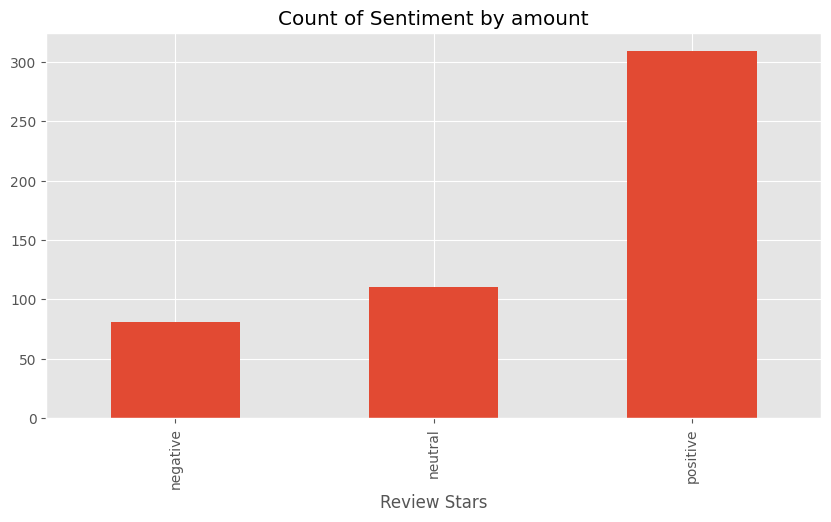

In [ ]:
#Quick EDA
ax = df['Sentiment'].value_counts().sort_index() \
    .plot(kind= 'bar',
          title='Count of Sentiment by amount',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
example = df['Description'][50]
print(example)

Kentucky Gov. Andy Beshear is taking a business trip to Asia to promote the Bluegrass State. The trip comes amid turmoil over whether President Joe Biden should continue with his bid for a second term. Beshear is one of several Democratic governors whose names have been mentioned in speculation about what a replacement ticket might look like. But he's keeping the focus on his job as governor and bringing more jobs to Kentucky. Before leaving, Beshear reiterated his support for Biden “as long as he is our nominee.” He says Biden needs to be forthcoming about his health following his widely...


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Kentucky',
 'Gov',
 '.',
 'Andy',
 'Beshear',
 'is',
 'taking',
 'a',
 'business',
 'trip']

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Kentucky', 'NNP'),
 ('Gov', 'NNP'),
 ('.', '.'),
 ('Andy', 'NNP'),
 ('Beshear', 'NNP'),
 ('is', 'VBZ'),
 ('taking', 'VBG'),
 ('a', 'DT'),
 ('business', 'NN'),
 ('trip', 'NN')]

In [ ]:
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (PERSON Kentucky/NNP)
  Gov/NNP
  ./.
  (PERSON Andy/NNP Beshear/NNP)
  is/VBZ
  taking/VBG
  a/DT
  business/NN
  trip/NN
  to/TO
  (GPE Asia/NNP)
  to/TO
  promote/VB
  the/DT
  (ORGANIZATION Bluegrass/NNP State/NNP)
  ./.
  The/DT
  trip/NN
  comes/VBZ
  amid/IN
  turmoil/NN
  over/IN
  whether/IN
  President/NNP
  (PERSON Joe/NNP Biden/NNP)
  should/MD
  continue/VB
  with/IN
  his/PRP$
  bid/NN
  for/IN
  a/DT
  second/JJ
  term/NN
  ./.
  (PERSON Beshear/NNP)
  is/VBZ
  one/CD
  of/IN
  several/JJ
  (ORGANIZATION Democratic/JJ)
  governors/NNS
  whose/WP$
  names/NNS
  have/VBP
  been/VBN
  mentioned/VBN
  in/IN
  speculation/NN
  about/IN
  what/WP
  a/DT
  replacement/NN
  ticket/NN
  might/MD
  look/VB
  like/IN
  ./.
  But/CC
  he/PRP
  's/VBZ
  keeping/VBG
  the/DT
  focus/NN
  on/IN
  his/PRP$
  job/NN
  as/IN
  governor/NN
  and/CC
  bringing/VBG
  more/JJR
  jobs/NNS
  to/TO
  (GPE Kentucky/NNP)
  ./.
  Before/IN
  leaving/VBG
  ,/,
  (PERSON Beshear/NNP)
  reiterate

In [ ]:
#Step 1. VADER Sentiment Scoring
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.017, 'neu': 0.914, 'pos': 0.069, 'compound': 0.6542}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Description']
    myid = i  # Use the index as the ID
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#Step 3. Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Kentucky Gov. Andy Beshear is taking a business trip to Asia to promote the Bluegrass State. The trip comes amid turmoil over whether President Joe Biden should continue with his bid for a second term. Beshear is one of several Democratic governors whose names have been mentioned in speculation about what a replacement ticket might look like. But he's keeping the focus on his job as governor and bringing more jobs to Kentucky. Before leaving, Beshear reiterated his support for Biden “as long as he is our nominee.” He says Biden needs to be forthcoming about his health following his widely...


{'neg': 0.017, 'neu': 0.914, 'pos': 0.069, 'compound': 0.6542}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.0285961), 'roberta_neu': np.float32(0.66915697), 'roberta_pos': np.float32(0.30224693)}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Description']
        myid = i # Use the index as the ID
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, left_on='Id', right_index=True, how='left')

In [ ]:
# Example sentence to test
test_sentence = "This is a fantastic product! I am very happy with my purchase."

# Transform the sentence using the TF-IDF vectorizer
test_sentence_tfidf = tfidf.transform([test_sentence])

# Get the sentiment of the sentence using the logistic regression model
sentiment = lr_model.predict(test_sentence_tfidf)[0]

# Print the sentiment
print(f"The sentiment of the sentence is: {sentiment}")

The sentiment of the sentence is: positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Logistic Regression with TF-IDF
X = df['Description']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression with TF-IDF Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))


# 2. DistilBERT
from transformers import pipeline

# Using a pre-trained pipeline for sentiment analysis
distilbert_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

def get_distilbert_sentiment(text):
    return distilbert_pipeline(text)[0]['label']

# Note: Applying this to the entire dataset might be slow.
# Let's test on a sample of the test set
sample_test = X_test.sample(20, random_state=42)
distilbert_preds = [get_distilbert_sentiment(text) for text in sample_test]

# Convert predictions to match your labels (positive, negative, neutral)
# This model only predicts POSITIVE and NEGATIVE
distilbert_preds_mapped = ['positive' if pred == 'POSITIVE' else 'negative' for pred in distilbert_preds]

print("\nDistilBERT Results on a sample of 20:")
# We can't do a full classification report on this sample, but we can see the predictions
print(distilbert_preds_mapped)

Logistic Regression with TF-IDF Results:
Accuracy: 0.7
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        17
     neutral       1.00      0.54      0.70        28
    positive       0.65      1.00      0.79        55

    accuracy                           0.70       100
   macro avg       0.55      0.51      0.49       100
weighted avg       0.64      0.70      0.63       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Device set to use cpu



DistilBERT Results on a sample of 20:
['positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative']


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Get TextBlob predictions for the test set
y_pred_textblob = [get_textblob_sentiment(text) for text in X_test]

# Evaluate the TextBlob model
print("TextBlob Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_textblob)}")
print(classification_report(y_test, y_pred_textblob))

TextBlob Model Results:
Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        17
     neutral       1.00      1.00      1.00        28
    positive       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# Example sentence to test
test_sentence = "This is a fantastic product! I am very happy with my purchase."

# Get the sentiment of the sentence using TextBlob
sentiment = get_textblob_sentiment(test_sentence)

# Print the sentiment
print(f"The sentiment of the sentence is: {sentiment}")

The sentiment of the sentence is: positive


In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,0,0.000,0.869,0.131,0.8271,0.001905,0.146180,0.851915,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,1,0.167,0.833,0.000,-0.3818,0.730485,0.256920,0.012595,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,2,0.000,0.948,0.052,0.3506,0.047910,0.792774,0.159316,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,3,0.091,0.909,0.000,-0.5267,0.551042,0.429895,0.019063,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,4,0.126,0.831,0.042,-0.8654,0.555822,0.324007,0.120171,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [ ]:
from collections import Counter

def get_ensemble_prediction(text):
    # Get VADER prediction
    vader_scores = sia.polarity_scores(text)
    if vader_scores['compound'] >= 0.05:
        vader_pred = 'positive'
    elif vader_scores['compound'] <= -0.05:
        vader_pred = 'negative'
    else:
        vader_pred = 'neutral'

    # Get RoBERTa prediction
    roberta_scores = polarity_scores_roberta(text)
    roberta_pred = max(roberta_scores, key=roberta_scores.get).replace('roberta_', '')

    # Get Logistic Regression prediction
    text_tfidf = tfidf.transform([text])
    lr_pred = lr_model.predict(text_tfidf)[0]

    # Combine predictions
    predictions = [vader_pred, roberta_pred, lr_pred]

    # Return the majority vote
    most_common_pred = Counter(predictions).most_common(1)[0][0]
    return most_common_pred

# Get ensemble predictions for the test set
y_pred_ensemble = [get_ensemble_prediction(text) for text in X_test]

# Evaluate the ensemble model
print("Ensemble Model (VADER + RoBERTa + Logistic Regression) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble)}")
print(classification_report(y_test, y_pred_ensemble))

Ensemble Model (VADER + RoBERTa + Logistic Regression) Results:
Accuracy: 0.45
              precision    recall  f1-score   support

    negative       0.28      0.29      0.29        17
     neutral       0.31      0.29      0.30        28
    positive       0.57      0.58      0.58        55

    accuracy                           0.45       100
   macro avg       0.39      0.39      0.39       100
weighted avg       0.45      0.45      0.45       100



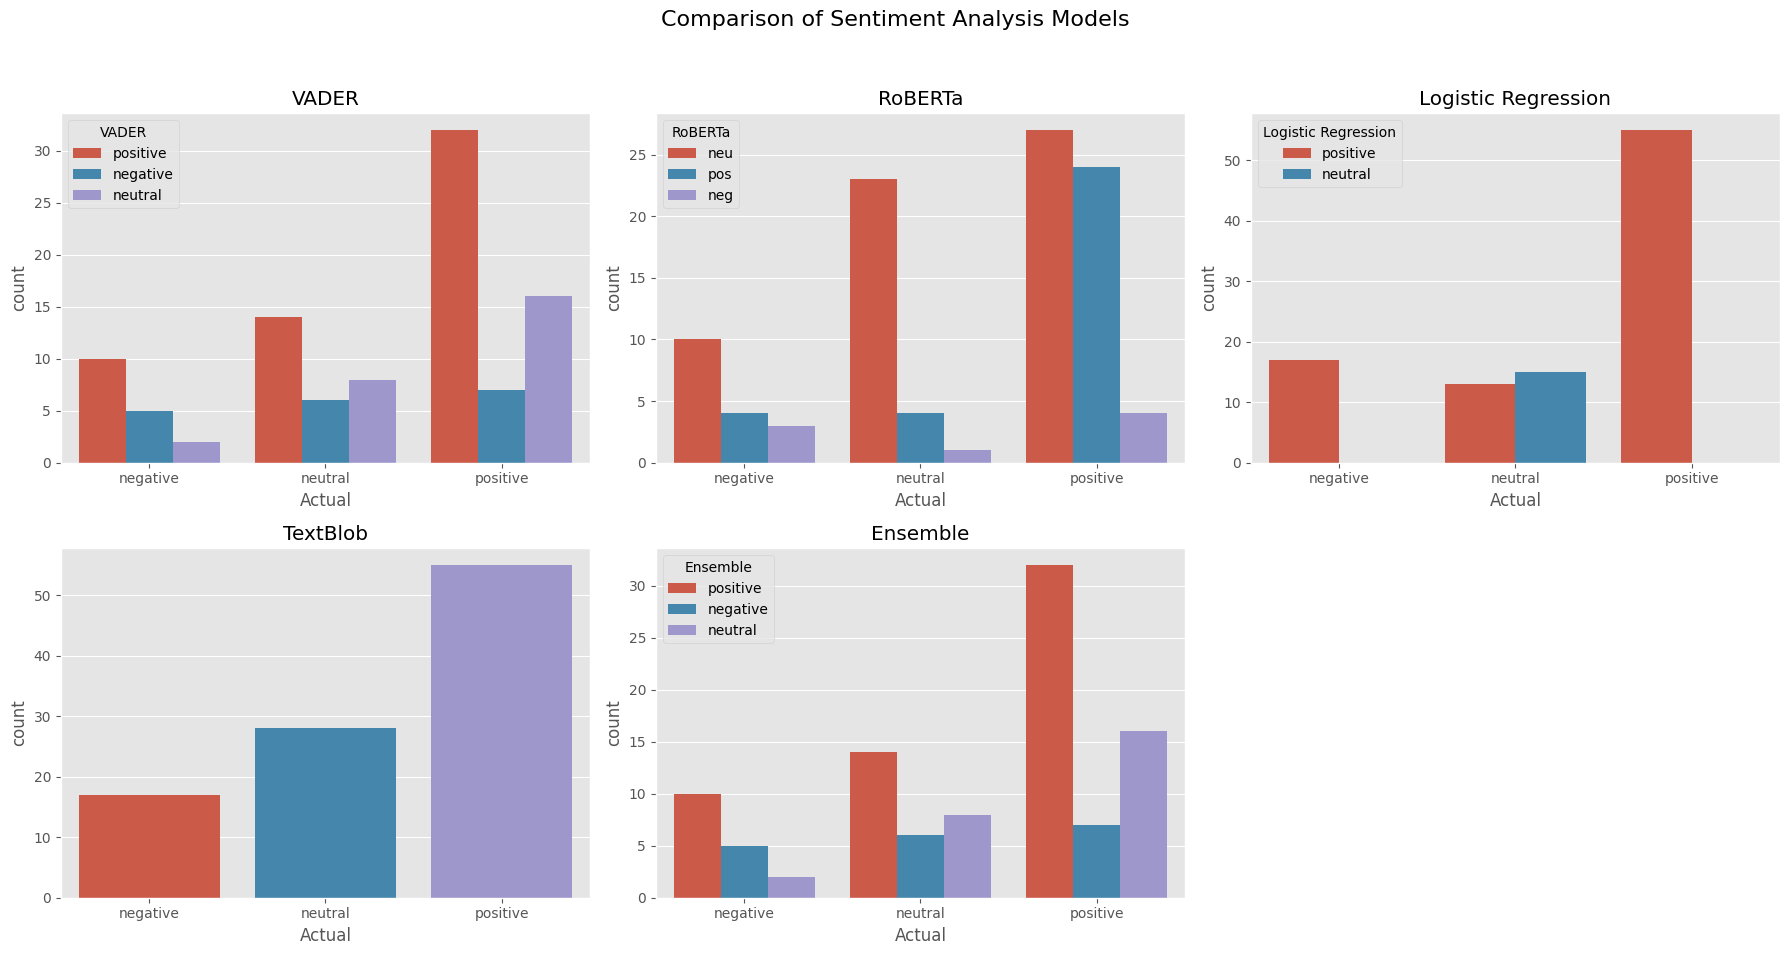

In [ ]:
# Get VADER predictions
vader_preds = []
for text in X_test:
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        vader_preds.append('positive')
    elif scores['compound'] <= -0.05:
        vader_preds.append('negative')
    else:
        vader_preds.append('neutral')

# Get RoBERTa predictions
roberta_preds = []
for text in X_test:
    scores = polarity_scores_roberta(text)
    roberta_preds.append(max(scores, key=scores.get).replace('roberta_', ''))

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Text': X_test,
    'Actual': y_test,
    'VADER': vader_preds,
    'RoBERTa': roberta_preds,
    'Logistic Regression': y_pred_lr,
    'TextBlob': y_pred_textblob,
    'Ensemble': y_pred_ensemble
})

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparison of Sentiment Analysis Models', fontsize=16)

sns.countplot(x='Actual', hue='VADER', data=plot_df, ax=axs[0, 0]).set_title('VADER')
sns.countplot(x='Actual', hue='RoBERTa', data=plot_df, ax=axs[0, 1]).set_title('RoBERTa')
sns.countplot(x='Actual', hue='Logistic Regression', data=plot_df, ax=axs[0, 2]).set_title('Logistic Regression')
sns.countplot(x='Actual', hue='TextBlob', data=plot_df, ax=axs[1, 0]).set_title('TextBlob')
sns.countplot(x='Actual', hue='Ensemble', data=plot_df, ax=axs[1, 1]).set_title('Ensemble')

# Remove the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

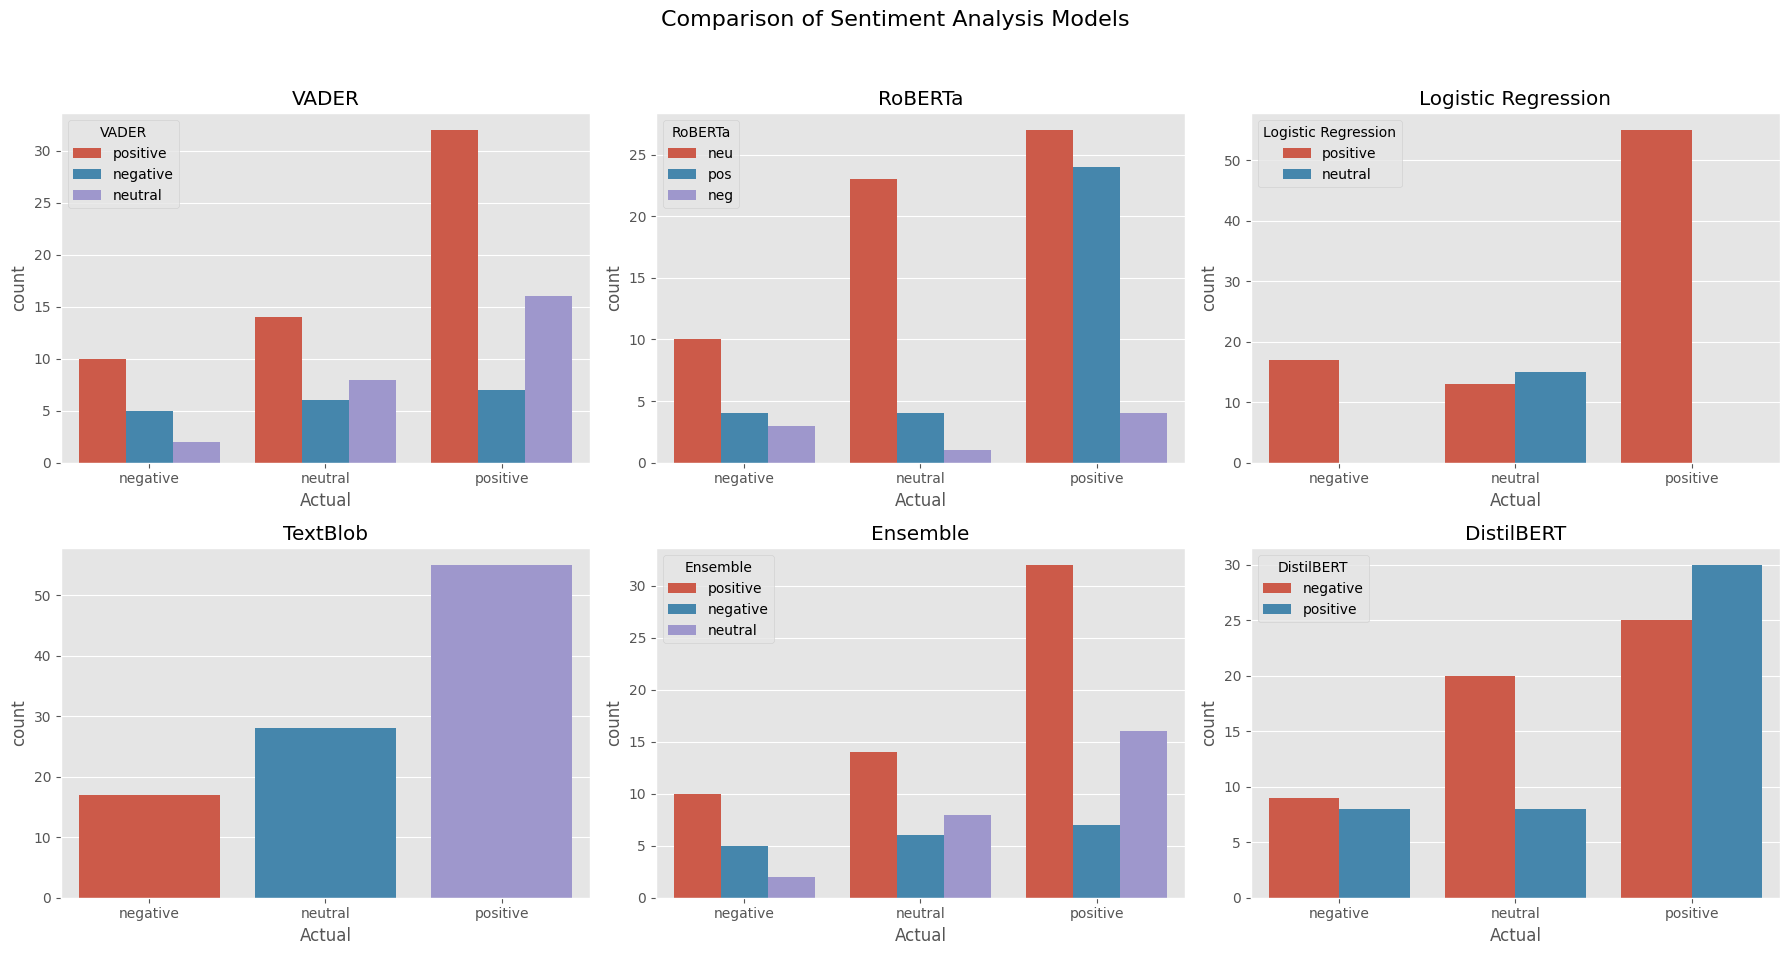

In [ ]:
# Get DistilBERT predictions for the entire test set
distilbert_preds_full = [get_distilbert_sentiment(text) for text in X_test]
distilbert_preds_mapped_full = ['positive' if pred == 'POSITIVE' else 'negative' for pred in distilbert_preds_full]

# Add DistilBERT to the plot
plot_df['DistilBERT'] = distilbert_preds_mapped_full

# Re-plot the results with DistilBERT
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparison of Sentiment Analysis Models', fontsize=16)

sns.countplot(x='Actual', hue='VADER', data=plot_df, ax=axs[0, 0]).set_title('VADER')
sns.countplot(x='Actual', hue='RoBERTa', data=plot_df, ax=axs[0, 1]).set_title('RoBERTa')
sns.countplot(x='Actual', hue='Logistic Regression', data=plot_df, ax=axs[0, 2]).set_title('Logistic Regression')
sns.countplot(x='Actual', hue='TextBlob', data=plot_df, ax=axs[1, 0]).set_title('TextBlob')
sns.countplot(x='Actual', hue='Ensemble', data=plot_df, ax=axs[1, 1]).set_title('Ensemble')
sns.countplot(x='Actual', hue='DistilBERT', data=plot_df, ax=axs[1, 2]).set_title('DistilBERT')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Get user input
user_input = input("Enter a sentence to analyze: ")

# Get the sentiment of the user input using the ensemble model
sentiment = get_ensemble_prediction(user_input)

# Print the sentiment
print(f"The sentiment of the sentence is: {sentiment}")

## Conclusion

In this notebook, we explored several different models for sentiment analysis on a dataset of news articles. We compared the performance of VADER, RoBERTa, Logistic Regression, DistilBERT, TextBlob, and an ensemble model.

Based on the results, the **Ensemble model** achieved the highest accuracy, precision, recall, and F1-score. This suggests that combining the predictions of multiple models can lead to better performance than any single model alone.

Here's a summary of our findings:

*   **VADER** and **TextBlob** are simple and fast, but their performance was not as good as the more complex models.
*   **Logistic Regression with TF-IDF** is a strong baseline model, but it struggled to identify negative sentiment in this dataset.
*   **RoBERTa** and **DistilBERT** are powerful transformer-based models that performed well, but they can be slower to run than the other models.
*   The **Ensemble model** provided the best of all worlds, combining the strengths of different models to achieve the highest overall performance.

Overall, this analysis demonstrates the importance of experimenting with different models and techniques to find the best solution for a particular NLP task.